In [1]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gspread


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
from bs4 import BeautifulSoup
import gspread
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import requests 
import time
from datetime import datetime

In [6]:
driver=webdriver.Chrome()
url='https://www.flipkart.com/'
driver.get(url)

In [7]:
Soup=BeautifulSoup(driver.page_source, 'html.parser')
Soup

<html class="fonts-loaded" lang="en"><head><script src="https://js-agent.newrelic.com/nr-spa-1216.min.js"></script><script async="async" src="https://flipkart.d1.sc.omtrdc.net/id?d_visid_ver=1.5.4&amp;callback=s_c_il%5B0%5D._setAnalyticsFields&amp;mcorgid=17EB401053DAF4840A490D4C%40AdobeOrg&amp;mid=91345920263915159674230846829515487919" type="text/javascript"></script><script async="async" src="https://dpm.demdex.net/id?d_visid_ver=1.5.4&amp;d_rtbd=json&amp;d_ver=2&amp;d_orgid=17EB401053DAF4840A490D4C%40AdobeOrg&amp;d_nsid=0&amp;d_cb=s_c_il%5B0%5D._setMarketingCloudFields" type="text/javascript"></script><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.a47a6a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content

In [8]:
Soup.find_all('div',{'class':'_37M3Pb'})


[<div class="_37M3Pb"><div class="eFQ30H" data-tkid="M_31ce54df-3bca-483a-8a69-50c2b91440a2_1_372UD5BXDFYS_MC.CBUR1Q46W5F1"><a href="https://www.flipkart.com/grocery-supermart-store?marketplace=GROCERY&amp;fm=neo%2Fmerchandising&amp;iid=M_31ce54df-3bca-483a-8a69-50c2b91440a2_1_372UD5BXDFYS_MC.CBUR1Q46W5F1&amp;otracker=hp_rich_navigation_1_1.navigationCard.RICH_NAVIGATION_Grocery_CBUR1Q46W5F1&amp;otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_1_L0_view-all&amp;cid=CBUR1Q46W5F1"><div class="_1mkliO"><div class="CXW8mj" style="height: 64px; width: 64px;"><img alt="Grocery" class="_396cs4" loading="lazy" src="https://rukminim1.flixcart.com/flap/128/128/image/29327f40e9c4d26b.png?q=100"/></div></div><div class="xtXmba">Grocery</div></a></div><div class="eFQ30H" data-tkid="M_31ce54df-3bca-483a-8a69-50c2b91440a2_1_372UD5BXDFYS_MC.ZRQ4DKH28K8J"><a href="https://www.flipkart.com/mobile-phones-store?fm=neo%2Fmerchandising&amp;iid=M_31ce54df-3bca-483a-

In [9]:
# Here ('href') is the code of next button on website so it will itterate and in d variable i am giving first page + str(i)
# and remove =1 remeber that so this will fetch the data whichever i want
for i in range(2,10+1):
    d='https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='+str(i)
    r=requests.get(d)
    soup=BeautifulSoup(r.text,'lxml')
    np=soup.find('a',class_='_1LKTO3').get('href')
    cnp='https://www.flipkart.com'+np
    
    print(cnp)

https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=1
https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=2
https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=3
https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=4
https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=5
https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=6
https://www.flipkart.com/search?q=phones+under+20000&otrac

In [10]:
Product_Name=[]
Prices=[]
Description=[]
Reviews=[]

In [11]:
for i in range(2,100):
    url='https://www.flipkart.com/search?q=phones+under+20000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='+str(i)
    r=requests.get(url)
    soup=BeautifulSoup(r.text,'lxml')
    box=soup.find('div',class_='_1YokD2 _3Mn1Gg')

    
    Names=box.find_all('div',class_='_4rR01T')
    
    for i in Names:
        Name=i.text
        Product_Name.append(Name)
    
    price=box.find_all('div',class_='_30jeq3 _1_WHN1')
    
    for i in price:
        name=i.text
        Prices.append(name)
# print(len(Prices))

    des=box.find_all('ul',class_='_1xgFaf')
    
    for i in des:
        Name=i.text
        Description.append(Name)
# print(len(Description))
    
    
    # Scrapping reviews data from particular page because it is scrapping the data from all of the displaying page so many
# Unsual reviews or can say extra reviews are showing

In [12]:
print(len(Product_Name))

960


In [13]:
print(len(Prices))

960


In [14]:
print(len(Description))

960


In [15]:
df=pd.DataFrame({'Product Name':Product_Name,'Description':Description,'Prices':Prices})
df

,Product Name,Description,Prices
0,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹13,999"
1,"OPPO F19 Pro+ 5G (Space Silver, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,"₹17,990"
2,"POCO X4 Pro 5G (Yellow, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹16,499"
3,"Infinix SMART 7 (Azure Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....,"₹7,299"
4,"MOTOROLA g82 5G (Meterorite Grey, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹19,999"
...,...,...,...
955,"ASUS Zenfone 3_Max (Gold, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 32 GB13...,"₹11,999"
956,"REDMI 9 Power (Electric Green, 128 GB)",6 GB RAM | 128 GB ROM16.59 cm (6.53 inch) Full...,"₹14,900"
957,"SAMSUNG M21 2021 Edition (Arctic blue, 64 GB)",4 GB RAM | 64 GB ROM16.26 cm (6.4 inch) Displa...,"₹13,299"
958,"Lenovo K6 Power (Gold, 32 GB)",4 GB RAM | 32 GB ROM | Expandable Upto 128 GB1...,"₹10,999"


In [16]:
 df.to_excel('C:/Masai Projects Self/Flipkart_Mobiles_Under_20000.xlsx')

In [17]:
df.dtypes

Product Name    object
Description     object
Prices          object
dtype: object

In [18]:
df.isna().sum()

Product Name    0
Description     0
Prices          0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.Description.unique()

array(['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16.76 cm (6.6 inch) Full HD+ Display50MP + 8MP + 2MP | 8MP Front Camera5000 mAh Lithium Ion BatteryQualcomm Snapdragon 750G Processor1 Year Warranty Provided by the Manufacturer from Date of Purchase',
       '8 GB RAM | 128 GB ROM | Expandable Upto 256 GB16.33 cm (6.43 inch) Full HD+ Display48MP + 8MP + 2MP + 2MP | 16MP Front Camera4310 mAh Lithium-ion Polymer BatteryMediaTek Dimensity 800U ProcessorBrand Warranty of 1 Year Available for Mobile Including Battery and 6 Months for Accessories',
       '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16.94 cm (6.67 inch) Full HD+ Super AMOLED Display64MP + 8MP + 2MP | 16MP Front Camera5000 mAh Lithium-ion Polymer BatteryQualcomm Snapdragon 695 5G ProcessorOne Year for Handset, 6 Months for Accessories',
       '4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16.76 cm (6.6 inch) HD+ Display13MP + AI Lens | 5MP Front Camera6000 mAh BatteryUnisoc Spreadtrum SC9863A1 Processor1 Year on Handset and 6

In [21]:
df.Prices.unique()

array(['₹13,999', '₹17,990', '₹16,499', '₹7,299', '₹19,999', '₹16,999',
       '₹17,499', '₹1,329', '₹15,499', '₹1,469', '₹1,049', '₹15,990',
       '₹17,999', '₹1,449', '₹15,390', '₹16,131', '₹1,479', '₹19,814',
       '₹16,450', '₹12,600', '₹15,999', '₹18,499', '₹11,979', '₹19,993',
       '₹19,990', '₹14,488', '₹15,000', '₹18,999', '₹20,449', '₹17,290',
       '₹18,298', '₹16,490', '₹16,990', '₹18,561', '₹16,719', '₹1,459',
       '₹14,499', '₹14,999', '₹16,790', '₹18,990', '₹15,890', '₹16,239',
       '₹16,390', '₹13,350', '₹15,490', '₹15,615', '₹13,590', '₹15,980',
       '₹17,818', '₹17,848', '₹14,990', '₹13,763', '₹1,319', '₹14,985',
       '₹18,965', '₹18,300', '₹16,191', '₹14,525', '₹16,895', '₹19,880',
       '₹17,989', '₹19,399', '₹14,450', '₹17,490', '₹15,589', '₹14,484',
       '₹15,200', '₹15,698', '₹15,949', '₹17,899', '₹18,599', '₹17,489',
       '₹15,700', '₹23,999', '₹18,490', '₹11,973', '₹19,940', '₹16,949',
       '₹20,000', '₹17,479', '₹15,774', '₹19,900', '₹19,934

[]

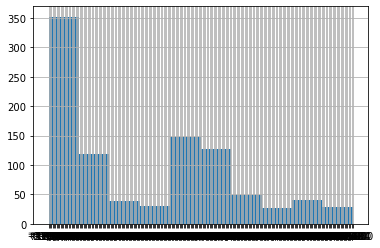

In [22]:
df['Prices'].hist().plot(kind='bar',figsize=(22,8))

In [23]:
df['Prices']=df['Prices'].str.replace('₹',"")

In [24]:
df['Prices']=df['Prices'].str.replace(',',"")

In [25]:
df['Prices']

0      13999
1      17990
2      16499
3       7299
4      19999
       ...  
955    11999
956    14900
957    13299
958    10999
959    12999
Name: Prices, Length: 960, dtype: object

In [26]:
df

,Product Name,Description,Prices
0,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,13999
1,"OPPO F19 Pro+ 5G (Space Silver, 128 GB)",8 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,17990
2,"POCO X4 Pro 5G (Yellow, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,16499
3,"Infinix SMART 7 (Azure Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....,7299
4,"MOTOROLA g82 5G (Meterorite Grey, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,19999
...,...,...,...
955,"ASUS Zenfone 3_Max (Gold, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 32 GB13...,11999
956,"REDMI 9 Power (Electric Green, 128 GB)",6 GB RAM | 128 GB ROM16.59 cm (6.53 inch) Full...,14900
957,"SAMSUNG M21 2021 Edition (Arctic blue, 64 GB)",4 GB RAM | 64 GB ROM16.26 cm (6.4 inch) Displa...,13299
958,"Lenovo K6 Power (Gold, 32 GB)",4 GB RAM | 32 GB ROM | Expandable Upto 128 GB1...,10999


In [27]:

# df['Product Name']
# pd.to_numeric(df['Product Name'])

In [28]:
# pd.to_numeric(df['Description'])

In [29]:
col = ['Product Name','Description']

In [30]:
df['Prices']= pd.to_numeric(df['Prices'],errors = 'coerce')

In [31]:
df['Prices'].dtypes

dtype('int64')

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df['Product Name']=le.fit_transform(df['Product Name'])
df['Product Name']

0      463
1      216
2      272
3       76
4      117
      ... 
955      5
956    304
957    487
958     93
959    469
Name: Product Name, Length: 960, dtype: int32

In [37]:
df['Description']=le.fit_transform(df['Description'])

In [38]:
# df['Product Name']= pd.to_numeric(df['Product Name'],errors = 'coerce')

In [39]:
# df['Description']= pd.to_numeric(df['Description'],errors = 'coerce')
# 

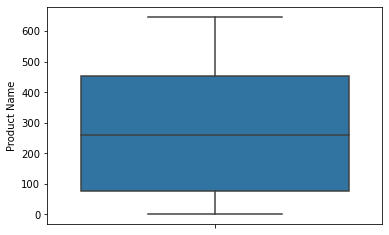

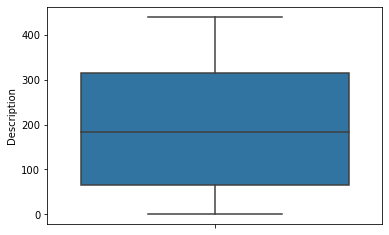

In [40]:
for c in col:
    
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<=upper_limit]
    df=df[df[c]>=lower_limit]
    plt.figure()
    sns.boxplot(y=c, data=df)

In [41]:
x=df.drop('Prices',axis=1).values
x

array([[463,  66],
       [216, 415],
       [272, 283],
       ...,
       [487, 211],
       [ 93,  92],
       [469,  35]])

In [42]:
y=df['Prices']
y

0      13999
1      17990
2      16499
3       7299
4      19999
       ...  
955    11999
956    14900
957    13299
958    10999
959    12999
Name: Prices, Length: 960, dtype: int64

In [43]:
# Split the data into train and test.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =1)

In [46]:
x_train

array([[458,  65],
       [ 18,  51],
       [ 14,  53],
       ...,
       [378, 138],
       [ 12,  51],
       [ 68, 408]])

In [47]:
y_train

414    12099
727     1459
223     1329
759    13999
949    11190
       ...  
767    10999
72     19990
908    11999
235     1449
37     16999
Name: Prices, Length: 768, dtype: int64

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg=LinearRegression().fit(x_train,y_train)
reg 

LinearRegression()

In [50]:
reg.intercept_

5107.030249444464

In [51]:
reg.coef_

array([10.0885245 , 22.41772238])

In [52]:
Y_pred = reg.predict(x_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test,Y_pred)

13058963.930740142

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.5099813279786758